Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_sobely.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

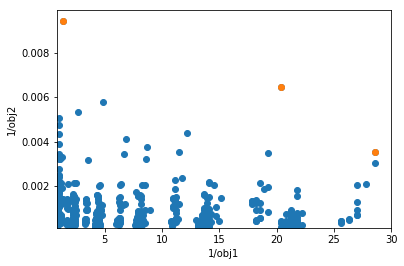

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


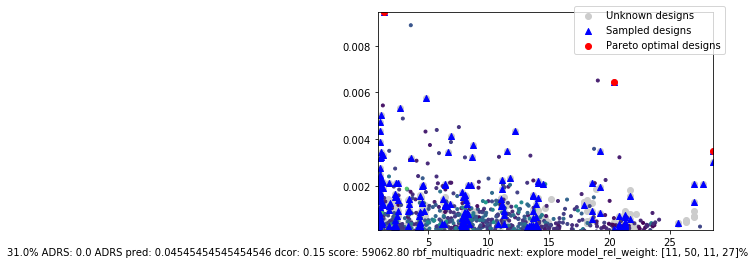

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([486, 488, 489, 249, 619,   5,  53, 195,  11, 147,  58,   4,  52,
         0, 699,  48,  94, 555, 280, 142,   1, 184,  42, 190, 736, 696,
         6, 739, 326, 194, 596, 505, 237,  54, 504,  49, 498, 560, 371,
       143, 166, 189, 701, 145, 659,  28, 561, 602, 148, 733, 182,  97,
       146, 414, 741, 124, 196, 461, 740, 409,  10, 377, 508, 152,  47,
       556, 127, 100, 734,  98, 484, 242, 285, 191, 233,  12,   2,   3,
        21, 617, 599,  51,   9, 187, 193, 600, 531, 188, 390, 126, 712,
       594, 163, 225, 399, 533, 737, 140, 329, 298,  15,  46, 397,  95,
       264, 235, 648, 581, 106, 330, 420,  56,  45, 234, 549, 697, 700,
       692, 368, 694, 153, 654,  91, 601,  76, 698, 372, 738, 710, 729,
       715, 151, 381, 468, 642, 519, 645, 506, 513, 389, 719, 704, 603,
       186, 258, 583, 582, 691, 411, 559, 466, 139, 200,  96, 713, 705,
       154, 328, 103, 123, 185, 365, 136, 357, 649, 587,  16,  88, 471,
        99, 512,  50,   8, 392, 192, 401, 681, 565, 181, 202, 20